In [74]:
import pandas as pd
import numpy as np

# Load the data
data = pd.read_csv(fr'C:\Users\ivane\Desktop\Dissertation\data\index_MSEPRX.csv')

data.head()


,Date,Index,Change,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,2025-01-10,3736.886,-0.66,NaN,NaN,NaN,NaN
1,2025-01-09,3761.777,-0.09,NaN,NaN,NaN,NaN
2,2025-01-08,3765.056,0.28,NaN,NaN,NaN,NaN
3,2025-01-07,3754.615,1.28,NaN,NaN,NaN,NaN
4,2025-01-06,3707.014,-1.36,NaN,NaN,NaN,NaN


In [75]:
data.drop(columns=['Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6'], inplace=True)

data.head()

,Date,Index,Change
0,2025-01-10,3736.886,-0.66
1,2025-01-09,3761.777,-0.09
2,2025-01-08,3765.056,0.28
3,2025-01-07,3754.615,1.28
4,2025-01-06,3707.014,-1.36


In [76]:
finbert_data = pd.read_csv(fr'C:\Users\ivane\Desktop\Dissertation\data\maltabusinessweeklyArticles.csv')

finbert_data.head()

# extract the date from the date column
finbert_data['date'] = pd.to_datetime(finbert_data['date'])
finbert_data['date'] = finbert_data['date'].dt.date
finbert_data_new = finbert_data.drop(columns=['headline', 'url', 'description'])

finbert_data_new.head()

,date,sentiment,sentiment_score
0,2025-01-11,positive,0.733871
1,2025-01-10,neutral,0.513142
2,2025-01-10,neutral,0.593185
3,2024-12-19,neutral,0.927772
4,2024-12-26,positive,0.802241


In [77]:
# get majority sentiment for each date

# Group by date and get the most common sentiment for each date
majority_sentiment = finbert_data_new.groupby('date')['sentiment'].agg(lambda x: x.value_counts().index[0]).reset_index()

# Calculate mean sentiment score for each date 
mean_sentiment_score = finbert_data_new.groupby('date')['sentiment_score'].mean().reset_index()

# Merge the majority sentiment and mean sentiment score
finbert_data_aggregated = pd.merge(majority_sentiment, mean_sentiment_score, on='date')

finbert_data_aggregated.head(10)


,date,sentiment,sentiment_score
0,2021-09-23,positive,0.922082
1,2021-09-24,neutral,0.890387
2,2021-09-27,positive,0.727195
3,2021-09-28,neutral,0.697538
4,2021-09-30,positive,0.860681
5,2021-10-01,positive,0.767713
6,2021-10-03,neutral,0.569838
7,2021-10-05,neutral,0.767535
8,2021-10-06,neutral,0.908943
9,2021-10-07,positive,0.807491


In [78]:
# Convert data's Date column to datetime.date format to match finbert_data_aggregated
data['Date'] = pd.to_datetime(data['Date']).dt.date

# Merge the two dataframes on date, using an inner join to keep only matching dates
merged_data = pd.merge(data, finbert_data_aggregated, 
                      left_on='Date', 
                      right_on='date', 
                      how='inner')

# Drop the redundant date column
merged_data.drop('date', axis=1, inplace=True)

# Display the first few rows of the merged dataset
merged_data.head()


,Date,Index,Change,sentiment,sentiment_score
0,2025-01-10,3736.886,-0.66,neutral,0.700804
1,2024-12-19,3708.531,-1.93,neutral,0.950467
2,2024-12-18,3781.551,0.18,positive,0.460880
3,2024-12-16,3765.163,0.45,positive,0.771217
4,2024-12-12,3748.267,0.10,positive,0.927686


In [79]:
# Convert sentiment labels to integers
sentiment_map = {'negative': -1, 'neutral': 0, 'positive': 1}
merged_data['sentiment'] = merged_data['sentiment'].map(sentiment_map)

# Display first few rows to verify the conversion
merged_data.head(20)


,Date,Index,Change,sentiment,sentiment_score
0,2025-01-10,3736.886,-0.66,0,0.700804
1,2024-12-19,3708.531,-1.93,0,0.950467
2,2024-12-18,3781.551,0.18,1,0.460880
3,2024-12-16,3765.163,0.45,1,0.771217
4,2024-12-12,3748.267,0.10,1,0.927686
5,2024-12-11,3744.451,-0.13,1,0.844994
6,2024-12-10,3749.303,0.37,0,0.695004
7,2024-12-06,3752.733,-0.80,-1,0.504000
8,2024-12-05,3782.822,-0.08,0,0.641164
9,2024-12-03,3788.521,0.21,1,0.945470


In [80]:
merged_data.describe()

,Index,Change,sentiment,sentiment_score
count,430.000000,430.000000,430.000000,430.000000
mean,3717.914142,0.036953,0.439535,0.775980
std,93.276242,0.652621,0.679243,0.115580
min,3502.632000,-2.160000,-1.000000,0.435771
25%,3644.316750,-0.287500,0.000000,0.701011
50%,3730.158000,0.010000,1.000000,0.790332
75%,3782.309750,0.330000,1.000000,0.865935
max,3960.473000,3.610000,1.000000,0.965703


In [81]:
merged_data.isnull().sum()

Date               0
Index              0
Change             0
sentiment          0
sentiment_score    0
dtype: int64

In [82]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM


In [83]:
merged_data.sort_values('Date')

,Date,Index,Change,sentiment,sentiment_score
429,2021-09-23,3881.104,0.16,1,0.922082
428,2021-09-24,3889.222,0.21,0,0.890387
427,2021-09-27,3891.593,0.06,1,0.727195
426,2021-09-28,3880.951,-0.27,0,0.697538
425,2021-09-30,3875.656,-0.23,1,0.860681
...,...,...,...,...,...
4,2024-12-12,3748.267,0.10,1,0.927686
3,2024-12-16,3765.163,0.45,1,0.771217
2,2024-12-18,3781.551,0.18,1,0.460880
1,2024-12-19,3708.531,-1.93,0,0.950467


In [84]:
train = merged_data.iloc[:215]
test = merged_data.iloc[215:]

In [85]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Set Date as index first
train = train.set_index('Date')
test = test.set_index('Date')

# Now scale only the numerical columns
numerical_columns = ['Index', 'Change', 'sentiment', 'sentiment_score']

train_scaled = train.copy()
test_scaled = test.copy()

train_scaled[numerical_columns] = scaler.fit_transform(train[numerical_columns])
test_scaled[numerical_columns] = scaler.transform(test[numerical_columns])




In [86]:
from keras.preprocessing.sequence import TimeseriesGenerator
# Convert DataFrame to numpy array and select the feature(s) we want to predict
# Let's say we want to predict the 'Index' column
data_array = train_scaled['Index'].values.reshape(-1, 1)

n_input = 3
n_features = 1
generator = TimeseriesGenerator(data_array,
                              data_array,
                              length=n_input,
                              batch_size=1)

X, y = generator[0]
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

# We do the same thing, but now instead for 12 months
n_input = 12
generator = TimeseriesGenerator(data_array,
                              data_array,
                              length=n_input,
                              batch_size=1)

Given the Array: 
[0.61740606 0.53530665 0.74672963]
Predict this y: 
 [[0.69927962]]


In [87]:
# define model
model = Sequential()
model.add(LSTM(100, activation='relu',
			input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.summary()
model.fit(generator, epochs=215)


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 100)               40800     
                                                                 
 dense_2 (Dense)             (None, 1)                 101       
                                                                 
Total params: 40901 (159.77 KB)
Trainable params: 40901 (159.77 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/215
203/203 [==============================] - 2s 4ms/step - loss: 0.0451
Epoch 2/215
203/203 [==============================] - 1s 4ms/step - loss: 0.0149
Epoch 3/215
203/203 [==============================] - 1s 4ms/step - loss: 0.0126
Epoch 4/215
203/203 [==============================] - 1s 4ms/step - loss: 0.0122
Epoch 5/215
203/203 [==============================] - 1s 4ms/step - loss: 0.0104
Ep

203/203 [==============================] - 1s 2ms/step


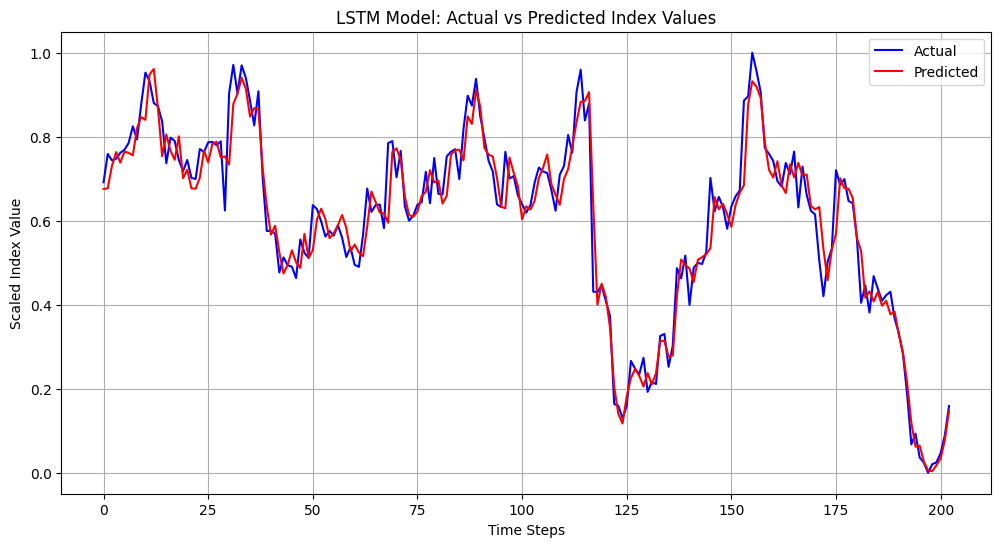

Root Mean Square Error: 0.0542


In [88]:
from sklearn.metrics import mean_squared_error

# Make predictions
predictions = model.predict(generator)

# Create a DataFrame with actual and predicted values
results_df = pd.DataFrame({
    'Actual': data_array[n_input:].flatten(),
    'Predicted': predictions.flatten()
})

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(results_df.index, results_df['Actual'], label='Actual', color='blue')
plt.plot(results_df.index, results_df['Predicted'], label='Predicted', color='red')
plt.title('LSTM Model: Actual vs Predicted Index Values')
plt.xlabel('Time Steps')
plt.ylabel('Scaled Index Value')
plt.legend()
plt.grid(True)
plt.show()

# Calculate and print some error metrics
mse = mean_squared_error(results_df['Actual'], results_df['Predicted'])
rmse = np.sqrt(mse)
print(f'Root Mean Square Error: {rmse:.4f}')

In [89]:
train = data.iloc[:215]
test = data.iloc[215:]

In [90]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Set Date as index first
train = train.set_index('Date')
test = test.set_index('Date')

# Now scale only the numerical columns
numerical_columns = ['Index', 'Change']

train_scaled = train.copy()
test_scaled = test.copy()

train_scaled[numerical_columns] = scaler.fit_transform(train[numerical_columns])
test_scaled[numerical_columns] = scaler.transform(test[numerical_columns])




In [91]:
from keras.preprocessing.sequence import TimeseriesGenerator
# Convert DataFrame to numpy array and select the feature(s) we want to predict
# Let's say we want to predict the 'Index' column
data_array = train_scaled['Index'].values.reshape(-1, 1)

n_input = 3
n_features = 1
generator = TimeseriesGenerator(data_array,
                              data_array,
                              length=n_input,
                              batch_size=1)

X, y = generator[0]
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

# We do the same thing, but now instead for 12 months
n_input = 12
generator = TimeseriesGenerator(data_array,
                              data_array,
                              length=n_input,
                              batch_size=1)

Given the Array: 
[0.26797507 0.39336359 0.40988157]
Predict this y: 
 [[0.35728499]]


In [92]:
# define model
model = Sequential()
model.add(LSTM(100, activation='relu',
			input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.summary()
model.fit(generator, epochs=215)


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 100)               40800     
                                                                 
 dense_3 (Dense)             (None, 1)                 101       
                                                                 
Total params: 40901 (159.77 KB)
Trainable params: 40901 (159.77 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/215
203/203 [==============================] - 2s 4ms/step - loss: 0.0522
Epoch 2/215
203/203 [==============================] - 1s 4ms/step - loss: 0.0245
Epoch 3/215
203/203 [==============================] - 1s 4ms/step - loss: 0.0162
Epoch 4/215
203/203 [==============================] - 1s 4ms/step - loss: 0.0154
Epoch 5/215
203/203 [==============================] - 1s 4ms/step - loss: 0.0134
Ep

203/203 [==============================] - 1s 2ms/step


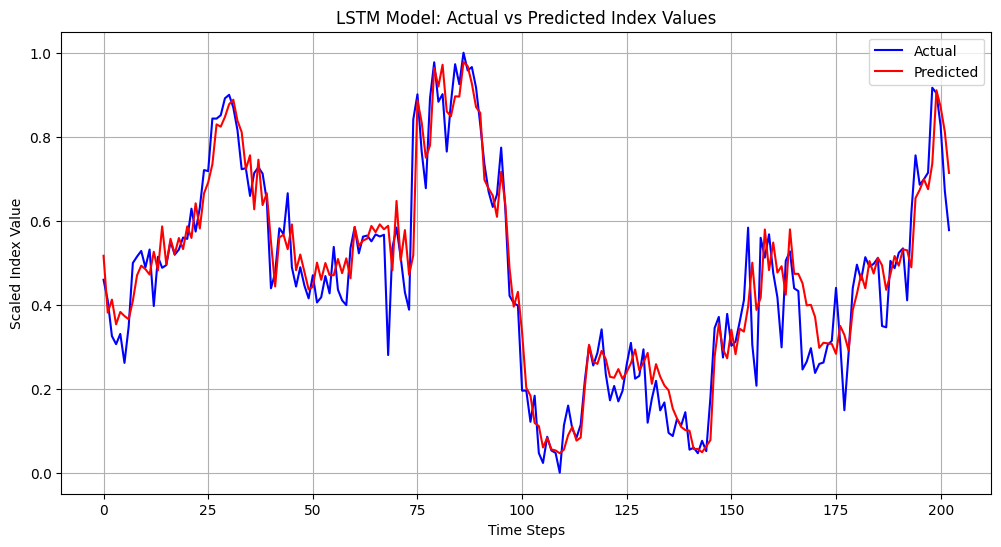

Root Mean Square Error: 0.0769


In [93]:
from sklearn.metrics import mean_squared_error

# Make predictions
predictions = model.predict(generator)

# Create a DataFrame with actual and predicted values
results_df = pd.DataFrame({
    'Actual': data_array[n_input:].flatten(),
    'Predicted': predictions.flatten()
})

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(results_df.index, results_df['Actual'], label='Actual', color='blue')
plt.plot(results_df.index, results_df['Predicted'], label='Predicted', color='red')
plt.title('LSTM Model: Actual vs Predicted Index Values')
plt.xlabel('Time Steps')
plt.ylabel('Scaled Index Value')
plt.legend()
plt.grid(True)
plt.show()

# Calculate and print some error metrics
mse = mean_squared_error(results_df['Actual'], results_df['Predicted'])
rmse = np.sqrt(mse)
print(f'Root Mean Square Error: {rmse:.4f}')